In [2]:
!pip install tensorflow

In [ ]:
!pip install matplotlib

In [5]:
# tensorflow, tf.keras 임포트
import tensorflow as tf
from tensorflow import keras

# 헬퍼 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt


In [4]:
fashion_mnist = keras.datasets.fashion_mnist  # 패션 MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # 학습 및 테스트 데이터 로드

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # 클래스 이름 정의

In [7]:
train_images.shape  # 학습 이미지 데이터의 형상 확인

(60000, 28, 28)

In [8]:
print(len(train_labels))  # 학습 레이블 데이터의 개수 출력
train_labels  # 학습 레이블 데이터 출력

60000


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

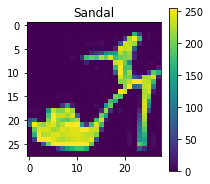

In [9]:
plt.figure(figsize=(3, 3))  # 그림의 크기 설정
plt.imshow(train_images[9])  # 9번째 학습 이미지 출력
plt.title(class_names[train_labels[9]])  # 9번째 학습 이미지의 클래스 이름 출력
plt.colorbar()  # 컬러바 출력

In [10]:
train_images = train_images / 255.0  # 학습 이미지 데이터 정규화
test_images = test_images / 255.0  # 테스트 이미지 데이터 정규화

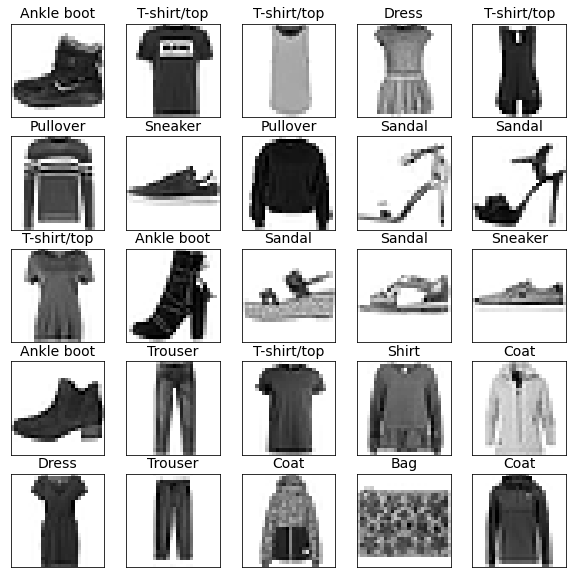

In [11]:
plt.figure(figsize=(10, 10))  # 그림의 크기 설정
for i in range(25):  # 처음 25개의 학습 이미지 출력
    plt.subplot(5, 5, i + 1)  # 5x5 서브플롯 설정
    plt.xticks([])  # x축 눈금 제거
    plt.yticks([])  # y축 눈금 제거
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # 학습 이미지 출력 (흑백)
    plt.title(class_names[train_labels[i]], fontsize=14)  # 이미지의 클래스 이름 출력, 폰트 크기 설정

In [12]:
model = keras.Sequential([ # 모델 구성
    keras.layers.Flatten(input_shape=(28, 28)),  # 입력층: 28x28 이미지를 1D 벡터로 변환
    keras.layers.Dense(256, activation='relu'),  # 첫 번째 은닉층: 256개의 유닛, ReLU 활성화 함수
    keras.layers.Dense(128, activation='relu'),  # 두 번째 은닉층: 128개의 유닛, ReLU 활성화 함수
    keras.layers.Dense(10, activation='softmax')  # 출력층: 10개의 유닛, 소프트맥스 활성화 함수 (10개의 클래스)
])

In [13]:
model.compile(optimizer='adam',  # 모델 컴파일: 옵티마이저로 Adam 사용
              loss='sparse_categorical_crossentropy',  # 손실 함수로 sparse_categorical_crossentropy 사용
              metrics=['accuracy'])  # 평가지표로 정확도 사용

In [14]:
model.fit(train_images, train_labels, epochs=5)  # 모델 학습: 학습 데이터로 5 에포크 동안 훈련

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4744 - accuracy: 0.8295
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3598 - accuracy: 0.8687
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3242 - accuracy: 0.8805
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3010 - accuracy: 0.8867
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2823 - accuracy: 0.8945


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)  # 모델 평가: 테스트 데이터로 손실과 정확도 평가
print('\n테스트 정확도:', test_acc)  # 테스트 데이터에 대한 정확도 출력

313/313 - 1s - loss: 0.3547 - accuracy: 0.8688 - 1s/epoch - 4ms/step

테스트 정확도: 0.8687999844551086


In [16]:
predictions = model.predict(test_images)  # 테스트 이미지에 대한 예측 생성

313/313 [==============================] - 1s 3ms/step


In [17]:
predictions[0]  # 첫 번째 테스트 이미지의 예측 결과 출력

array([2.4875354e-07, 1.1198201e-07, 2.7344980e-08, 6.7404173e-08,
       3.3586179e-08, 2.9809435e-03, 1.2817905e-07, 1.8446233e-02,
       1.6246506e-07, 9.7857213e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])  # 첫 번째 테스트 이미지의 예측 중 가장 높은 확률을 가진 클래스의 인덱스 찾기

9

In [19]:
class_names[test_labels[0]]  # 첫 번째 테스트 이미지의 실제 클래스 이름 출력

'Ankle boot'

In [20]:
def plot_image(i, predictions_array, true_label, img): # i: 이미지 인덱스, predictions_array: 예측 확률 배열, true_label: 실제 레이블, img: 이미지 데이터

  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]  # 인덱스 i에 해당하는 예측 확률 배열, 실제 레이블, 이미지 선택
  
  plt.grid(False)  # 이미지에 격자 무시 설정
  plt.xticks([])  # x축 눈금 제거
  plt.yticks([])  # y축 눈금 제거
  plt.imshow(img, cmap=plt.cm.binary)  # 이미지 출력 (흑백)
  
  predicted_label = np.argmax(predictions_array)  # 예측 확률 배열에서 가장 높은 확률을 가진 클래스의 인덱스 찾기
  
  if predicted_label == true_label:  # 예측이 실제 레이블과 일치하는 경우
    color = 'blue'  # 맞춘 경우 파란색
  else:
    color = 'red'  # 틀린 경우 빨간색

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],  # 예측 클래스 이름과 확률, 실제 클래스 이름을 라벨로 설정
                                100*np.max(predictions_array),  # 예측 확률을 백분율로 변환
                                class_names[true_label]),  # 실제 클래스 이름
                                color=color)  # 텍스트 색상 설정

In [21]:
def plot_value_array(i, predictions_array, true_label): # i: 이미지 인덱스, predictions_array: 예측 확률 배열, true_label: 실제 레이블

  predictions_array, true_label = predictions_array[i], true_label[i]  # 인덱스 i에 해당하는 예측 확률 배열과 실제 레이블 선택

  plt.grid(False)  # 그래프에 격자 무시 설정
  plt.xticks([])  # x축 눈금 제거
  plt.yticks([])  # y축 눈금 제거

  thisplot = plt.bar(range(10), predictions_array, color="#777777")  # 10개의 클래스에 대해 예측 확률을 막대 그래프 형태로 출력, 기본 색상은 회색

  plt.ylim([0, 1])  # y축의 범위를 0에서 1로 설정

  predicted_label = np.argmax(predictions_array)  # 예측 확률 배열에서 가장 높은 확률을 가진 클래스의 인덱스 찾기
  thisplot[predicted_label].set_color('red')  # 예측한 클래스의 막대 색상을 빨간색으로 변경
  thisplot[true_label].set_color('blue')  # 실제 레이블의 막대 색상을 파란색으로 변경

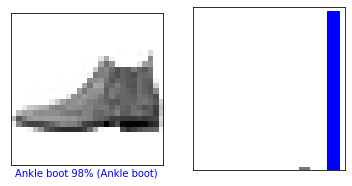

In [22]:
i = 0  # 시각화할 이미지의 인덱스 설정 (여기서는 첫 번째 이미지인 0을 선택)

plt.figure(figsize=(6, 3))  # 그림의 크기를 가로 6인치, 세로 3인치로 설정
plt.subplot(1, 2, 1)  # 1행 2열의 서브플롯 중 첫 번째 위치에 해당하는 서브플롯을 선택
plot_image(i, predictions, test_labels, test_images)  # plot_image 함수 호출하여 i 번째 이미지와 예측 결과, 실제 레이블을 시각화
plt.subplot(1, 2, 2)  # 1행 2열의 서브플롯 중 두 번째 위치에 해당하는 서브플롯을 선택
plot_value_array(i, predictions, test_labels)  # plot_value_array 함수 호출하여 i 번째 이미지의 예측 확률 분포를 시각화
plt.show()  # 위에서 설정한 서브플롯들을 화면에 출력

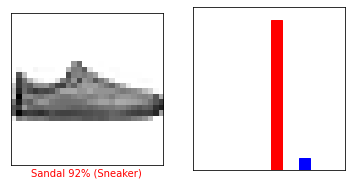

In [23]:
i = 12  # 시각화할 이미지의 인덱스를 12로 설정 (12번째 테스트 이미지 선택)

plt.figure(figsize=(6, 3))  # 그림의 크기를 가로 6인치, 세로 3인치로 설정
plt.subplot(1, 2, 1)  # 1행 2열의 서브플롯 레이아웃에서 첫 번째 서브플롯 선택
plot_image(i, predictions, test_labels, test_images)  # plot_image 함수 호출하여 i=12인 이미지와 예측 결과, 실제 레이블을 시각화
plt.subplot(1, 2, 2)  # 1행 2열의 서브플롯 레이아웃에서 두 번째 서브플롯 선택
plot_value_array(i, predictions, test_labels)  # plot_value_array 함수 호출하여 i=12인 이미지의 예측 확률 분포를 시각화
plt.show()  # 위에서 설정한 모든 서브플롯들을 화면에 출력

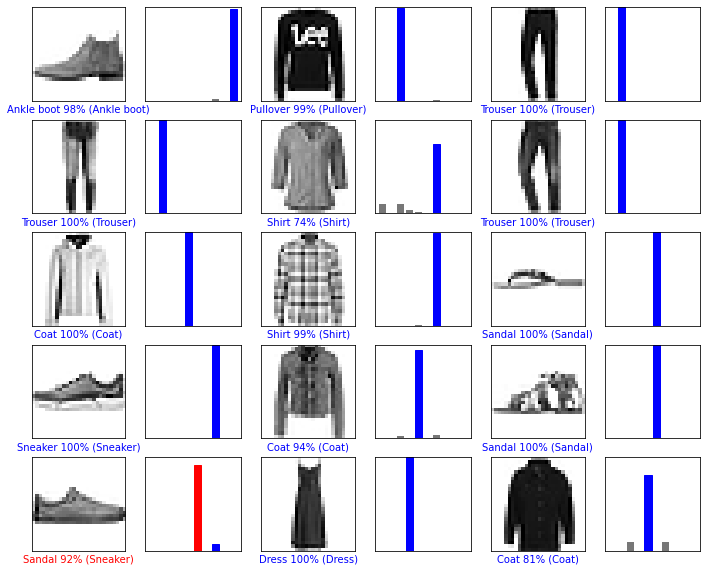

In [24]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다  # X 개의 테스트 이미지와 그에 대한 예측 및 실제 레이블을 시각화합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다  # 올바른 예측은 파란색으로, 잘못된 예측은 빨간색으로 표시됩니다

num_rows = 5  # 출력할 이미지의 행 수 설정 (5행으로 설정)
num_cols = 3  # 출력할 이미지의 열 수 설정 (3열로 설정)
num_images = num_rows * num_cols  # 총 출력할 이미지의 개수 계산 (5행 * 3열 = 15개)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))  # 전체 그림의 크기를 가로 12인치(2*2*3), 세로 10인치(2*5)로 설정
for i in range(num_images):  # 총 15개의 이미지에 대해 반복
  plt.subplot(num_rows, 2*num_cols, 2*i+1)  # 5행 6열의 서브플롯에서 홀수 인덱스의 서브플롯을 선택 (이미지 출력용)
  plot_image(i, predictions, test_labels, test_images)  # plot_image 함수 호출하여 i 번째 이미지와 예측 결과, 실제 레이블을 시각화
  plt.subplot(num_rows, 2*num_cols, 2*i+2)  # 5행 6열의 서브플롯에서 짝수 인덱스의 서브플롯을 선택 (예측 확률 분포 출력용)
  plot_value_array(i, predictions, test_labels)  # plot_value_array 함수 호출하여 i 번째 이미지의 예측 확률 분포를 시각화
plt.show()  # 위에서 설정한 모든 서브플롯들을 화면에 출력


In [ ]:
#합성곱 CNN 만들기

In [25]:
model2 = keras.Sequential([  # Sequential API를 사용하여 Keras 모델 정의를 시작합니다.
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 2D Convolutional layer: 32개의 필터, 3x3 커널, ReLU 활성화 함수, 입력 형태는 (28, 28, 1)
    keras.layers.MaxPooling2D((2, 2)),  # 2x2 Max Pooling layer: feature map의 차원을 줄이고 특성 추출
    keras.layers.Conv2D(64, (3, 3), activation='relu'),  # 2D Convolutional layer: 64개의 필터, 3x3 커널, ReLU 활성화 함수
    keras.layers.MaxPooling2D((2, 2)),  # 2x2 Max Pooling layer: feature map의 차원을 줄이고 특성 추출
    keras.layers.Flatten(),  # Flatten layer: 2D feature map을 1D 벡터로 변환
    keras.layers.Dense(64, activation='relu'),  # Dense layer: 64개의 유닛, ReLU 활성화 함수
    keras.layers.Dense(10, activation='softmax')  # Dense layer: 10개의 유닛, softmax 활성화 함수 (출력층: 10개의 클래스 확률 예측)
])
model2.summary()  # 모델의 요약 정보를 출력 (층의 구성, 파라미터 수 등)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [26]:
model2.compile(  # 모델 컴파일을 시작합니다.
    optimizer='adam',  # Adam 옵티마이저를 사용하여 모델의 가중치를 업데이트합니다.
    loss='sparse_categorical_crossentropy',  # 손실 함수로 sparse categorical crossentropy를 사용하여 클래스 레이블이 정수형인 다중 클래스 분류 문제를 해결합니다.
    metrics=['accuracy']  # 모델의 성능을 평가하기 위해 정확도(accuracy)를 메트릭으로 사용합니다.
)

model2.fit(train_images, train_labels, epochs=5)  # 모델을 학습합니다. 훈련 데이터(train_images, train_labels)로 5번의 에폭 동안 학습을 진행합니다.
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)  # 테스트 데이터(test_images, test_labels)로 모델을 평가합니다. 손실과 정확도를 반환합니다. verbose=2는 결과를 자세히 출력합니다.
print('\n테스트 정확도:', test_acc)  # 테스트 데이터에서 모델의 정확도를 출력합니다.


Epoch 1/5
1875/1875 [==============================] - 49s 25ms/step - loss: 0.4634 - accuracy: 0.8314
Epoch 2/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3107 - accuracy: 0.8866
Epoch 3/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2676 - accuracy: 0.9024
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2368 - accuracy: 0.9130
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2139 - accuracy: 0.9204
313/313 - 3s - loss: 0.2690 - accuracy: 0.9019 - 3s/epoch - 11ms/step

테스트 정확도: 0.9018999934196472
